Steps:
Import Libraries and Load Data
Handle missing values if they exist (both).
Categorical to numerical (both).
Features Engineering/Feature Selection (both)
Divide the dataset into training and test data.
Import sklearn and construct an object for the ml algorithm. Fit and predict, then train and test (traindf).
Calculate the accuracy score.
Calculate the probability (if necessary).
Repeat steps 7-9 for test data (if necessary).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:

import pandas as pd
uploaded = files.upload()
filename = next(iter(uploaded))
traindf = pd.read_excel('train.xlsx')


Saving train.xlsx to train (1).xlsx


In [7]:
traindf.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [9]:
import pandas as pd
uploaded = files.upload()
filename = next(iter(uploaded))
testdf = pd.read_excel('test.xlsx')

Saving test.xlsx to test.xlsx


In [10]:
testdf.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


 Handling Missing values

In [11]:
traindf.isna().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

<Axes: >

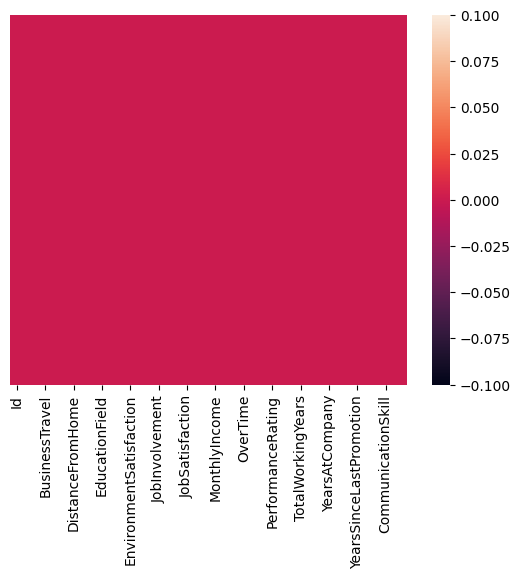

In [13]:
import seaborn as sns
sns.heatmap(testdf.isnull(), yticklabels = False)

In [15]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
for column in traindf.columns:
    if traindf[column].dtype == np.number:
        continue
    traindf[column] = LabelEncoder().fit_transform(traindf[column])

<ipython-input-15-134fe2994229>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if traindf[column].dtype == np.number:
<ipython-input-15-134fe2994229>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if traindf[column].dtype == np.number:
<ipython-input-15-134fe2994229>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if traindf[column].dtype == np.number:
<ipython-input-15-134fe2994229>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if traindf[column].dtype == np.number:
<ipython-input-15-134fe2994229>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` 

Drop columns in train dataset

In [16]:
cols = ['Id', 'EmployeeNumber', 'Behaviour']

traindf.drop(traindf[cols], axis = 1, inplace=True)
testdf.drop(testdf[cols], axis = 1, inplace = True)

<Axes: >

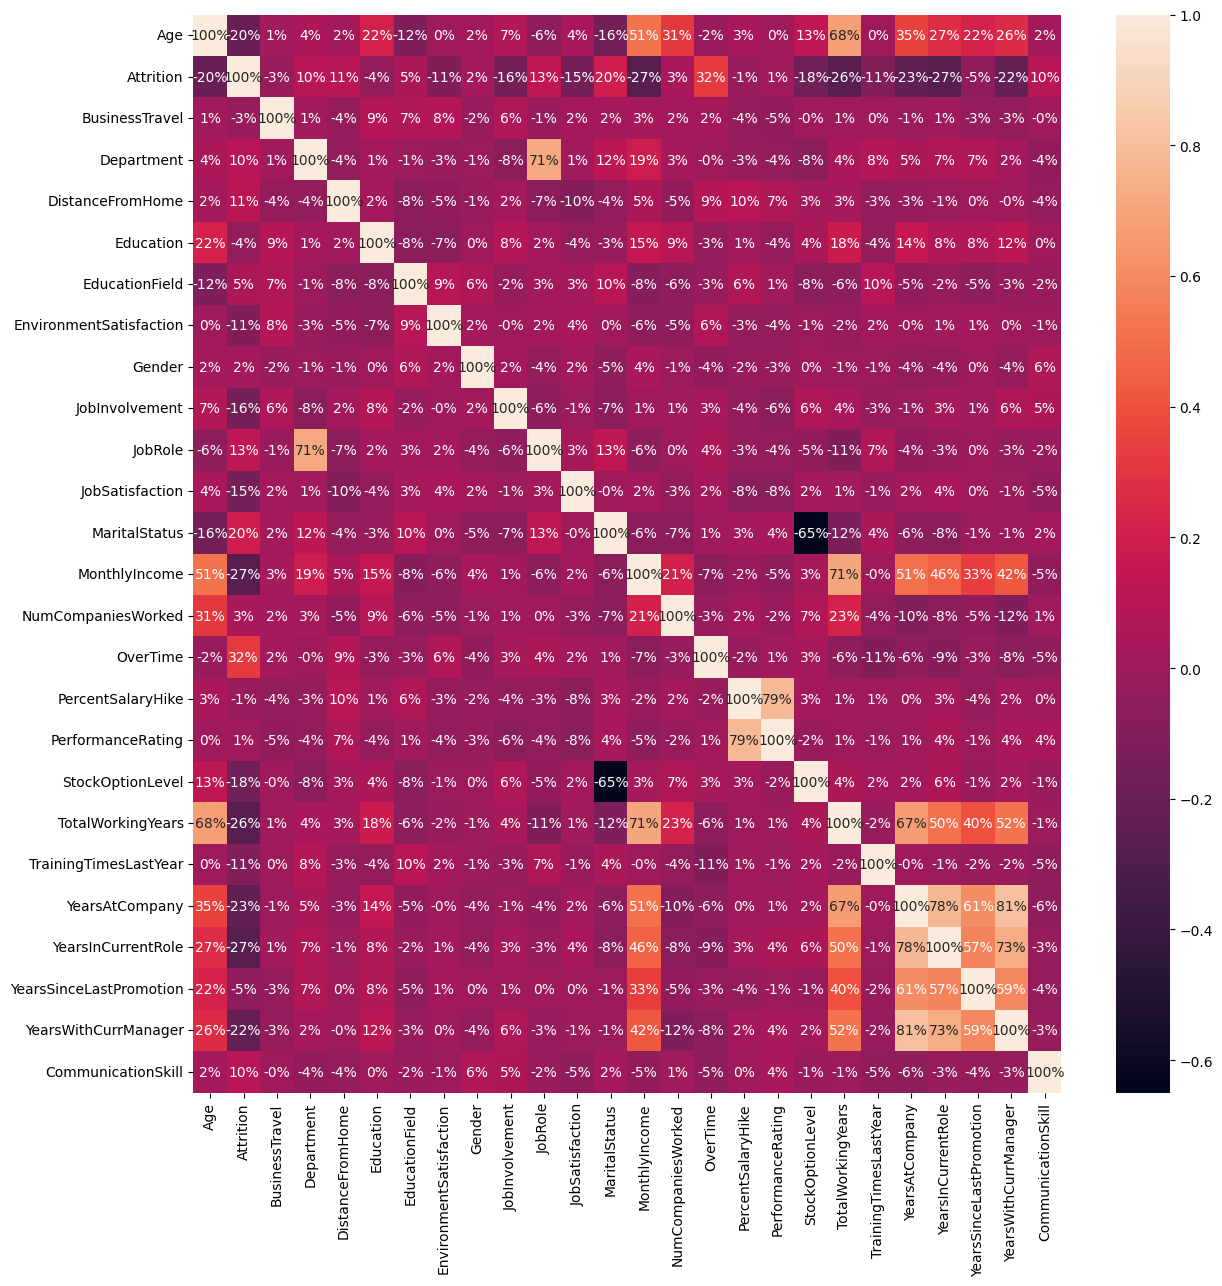

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
sns.heatmap(traindf.corr(), annot=True, fmt='.0%')

labelEncoder

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(traindf.drop('Attrition', axis=1),
                                                   traindf['Attrition'], test_size = 0.30)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=79)

In [21]:
model.fit(X_train, y_train)  #train our model
preds = model.predict(X_test)        #testing our model

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
accuracy

0.9815950920245399

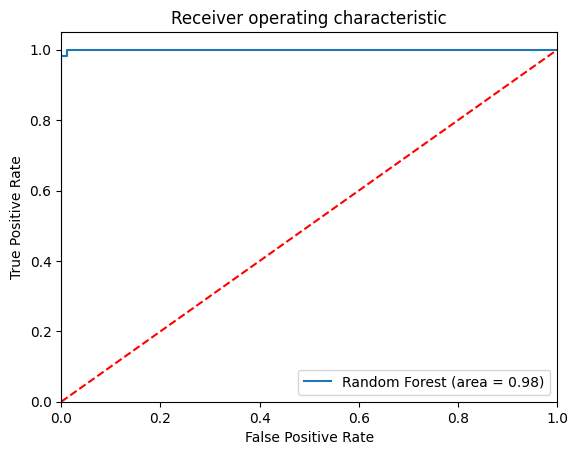

In [23]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [24]:
train_prob = model.predict_proba(X_test)[:, 1]
train_prob

array([0.368, 0.88 , 0.952, 0.988, 0.912, 0.26 , 1.   , 0.952, 0.16 ,
       0.08 , 0.568, 0.956, 0.064, 0.488, 0.976, 0.272, 0.724, 0.928,
       0.908, 0.968, 0.26 , 0.844, 0.844, 0.204, 0.996, 0.084, 0.144,
       0.952, 0.984, 0.112, 0.96 , 0.172, 0.196, 0.988, 0.448, 0.968,
       0.992, 0.996, 0.312, 0.056, 0.996, 0.144, 0.24 , 0.304, 0.396,
       0.052, 0.16 , 0.4  , 0.088, 0.912, 0.984, 0.28 , 0.328, 0.232,
       0.096, 0.268, 0.072, 0.96 , 0.12 , 0.088, 0.052, 0.176, 0.344,
       0.944, 0.032, 0.952, 0.256, 0.932, 0.98 , 0.988, 0.504, 0.068,
       0.092, 0.028, 0.112, 0.968, 0.156, 0.928, 0.984, 0.14 , 0.972,
       0.316, 0.364, 0.36 , 0.072, 0.36 , 0.172, 0.1  , 0.06 , 0.844,
       0.968, 0.072, 0.2  , 0.904, 0.084, 0.112, 0.076, 0.128, 0.124,
       0.94 , 0.984, 0.34 , 0.2  , 0.06 , 0.96 , 0.108, 0.928, 0.96 ,
       0.94 , 0.992, 0.88 , 0.432, 0.176, 0.948, 0.928, 0.996, 0.988,
       0.216, 0.972, 0.984, 0.232, 0.992, 1.   , 0.208, 0.952, 0.46 ,
       0.328, 0.192,